## Introduction

"Every strike brings me closer to the next home run." - Babe Ruth

Every team in the MLB would like to make it to the playoffs but the Toronto Blue Jays are on a tight budget and has asked us to figure out how to succeed in scouting players so that they have a better chance in the playoffs with the limitations.

### Data and Library Import

Here we import all the necessary Libraries as well as the dataset from Google Drive.

In [6]:
import pandas as pd
import numpy as np
import datetime
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sb
from statsmodels import regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [2]:
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [0]:
baseball_df=pd.read_csv('/content/Drive/My Drive/baseball.csv',low_memory=False)

## Data Examination

Here we are looking at the dataset to see how big it is, what data they contain as well as what type of data they are.

In [8]:
baseball_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          1232 non-null   object 
 1   League        1232 non-null   object 
 2   Year          1232 non-null   int64  
 3   RS            1232 non-null   int64  
 4   RA            1232 non-null   int64  
 5   W             1232 non-null   int64  
 6   OBP           1232 non-null   float64
 7   SLG           1232 non-null   float64
 8   BA            1232 non-null   float64
 9   Playoffs      1232 non-null   int64  
 10  RankSeason    244 non-null    float64
 11  RankPlayoffs  244 non-null    float64
 12  G             1232 non-null   int64  
 13  OOBP          420 non-null    float64
 14  OSLG          420 non-null    float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [9]:
baseball_df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [10]:
baseball_df.tail()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


In [11]:
#checking how many values in the data are Null
baseball_df.isnull().sum()

Team              0
League            0
Year              0
RS                0
RA                0
W                 0
OBP               0
SLG               0
BA                0
Playoffs          0
RankSeason      988
RankPlayoffs    988
G                 0
OOBP            812
OSLG            812
dtype: int64

In [12]:
baseball_df.nunique()

Team             39
League            2
Year             47
RS              374
RA              381
W                63
OBP              87
SLG             162
BA               75
Playoffs          2
RankSeason        8
RankPlayoffs      5
G                 8
OOBP             72
OSLG            112
dtype: int64

The following list explains what each column represents in the dataset, type of data they contain and if they are categorical or not.

1. RS — Runs Scored- Discrete numerical data
2. RA — Runs Allowed- Discrete numerical data
3. W — Wins- Discrete numerical data
4. OBP — On Base Percentage- Continuous numerical data
5. SLG — Slugging Percentage- Continuous numerical data
6. BA — Batting Average- Continuous numerical data
7. Playoffs — Whether a team made it to playoffs or not- Numeral Categorical data
8. OOBP — Opponent’s On Base Percentage- Continuous numerical data
9. OSLG — Opponents Slugging Percentage- Continuous numerical data
10. G - Games played- Discrete numerical data

OBP — On Base Percentage: This is a statistic measuring how frequently a batter reaches base, it does not take into account how far the batter runs i.e. third base.


SLG — Slugging Percentage: A measure of the batting ‘Productivity’, in simple terms, it measures how far a batter makes it when they hit the ball.


BA — Batting Average: Defined by the number of hits divided by at bats, measures how likely a batter is to hit a ball when pitched. Again, does not take into account how far the batter runs.

In [13]:
#run difference
baseball_df['RD']=baseball_df['RS']-baseball_df['RA']

## Feedback

Any explanation as to why you want to only keep observations from the year 2000 and onward?

In [14]:
baseball_df=baseball_df[baseball_df.Year>2000]

In [15]:
baseball_df.shape

(360, 16)

We added a new column named RD which represents Run Difference between RS and RA and filtered the years to the last 20 years.

In [16]:
baseball_df

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,SFG,NL,2001,799,748,90,0.342,0.460,0.266,0,NaN,NaN,162,0.329,0.404,51
356,STL,NL,2001,814,684,93,0.339,0.441,0.270,1,4.0,4.0,162,0.328,0.428,130
357,TBD,AL,2001,672,887,62,0.320,0.388,0.258,0,NaN,NaN,162,0.345,0.452,-215
358,TEX,AL,2001,890,968,73,0.344,0.471,0.275,0,NaN,NaN,162,0.362,0.494,-78


## Exploratory Data Analysis

Here we have a scatterplot between Runs Scored and Wins that they have and if they have been in the playoffs or not. It seems that if you have been in the play offs, you would have more wins and runs scored then if you don't.

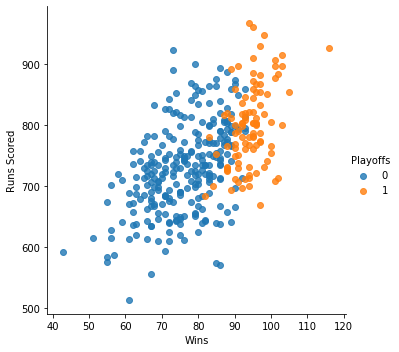

In [17]:
sb.lmplot(x = "W", y = "RS", fit_reg = False, hue = "Playoffs", data=baseball_df)
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.show()

In [18]:
baseball_df['W'].corr(baseball_df['RS'])

0.5785015854551099

The correlation between between Runs Scored and Wins have a moderate positive relationship value of 0.579.

## Feedback

In the real world, when you have a variables that have a correlation that's at 0.579, it is considered a high correlation, although there are arbitrary thresholds for high, medium and low thesholds for 0.7, 0.5 and 0.3, respectively.

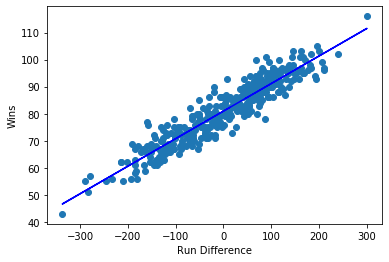

In [33]:
x = np.array(baseball_df.RD)
y = np.array(baseball_df.W)
slope, intercept = np.polyfit(x, y, 1)
abline_values = [slope * i + intercept for i in x]
plt.scatter(baseball_df.RD, baseball_df.W)
plt.plot(x, abline_values,'b')
plt.xlabel("Run Difference")
plt.ylabel("Wins")
plt.show()

In [20]:
print('slope=',slope)

slope= 0.10176044297075405


In [23]:
baseball_df['W'].corr(baseball_df['RD'])

0.9386297182521279

This is a scatter plot between Run Difference and Win and as you can see from the diagram, that they have a strong correlation with each other with a value of 0.939 and a slope of 0.1018.

## Feedback

This level of correlation between Run Difference and Number of Wins is very high even by tempered standards. This is intuitive with how the game works.

In [24]:
#descriptive statistical value between wins and run difference and run scored
baseball_df[['W','RS','RD']].describe()

,W,RS,RD
count,360.000000,360.000000,360.000000
mean,80.963889,748.177778,0.000000
std,11.725330,78.933960,108.153455
min,43.000000,513.000000,-337.000000
25%,72.000000,697.000000,-79.750000
50%,82.000000,743.000000,7.000000
75%,90.000000,801.250000,81.000000
max,116.000000,968.000000,300.000000


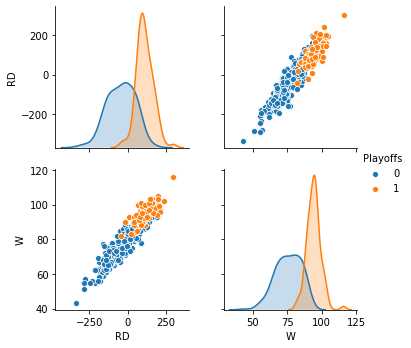

In [25]:
corrcheck = baseball_df[['RD', 'W', 'Playoffs']].copy()
g = sb.pairplot(corrcheck, hue = 'Playoffs',vars=["RD", "W"])

As we can see from the evidence of the charts and the correlation values between the variable, there is a clear linear relationship between them.

## Feedback 

The linear plot and distribution plot of runs and wins is a beautiful example of the types of relationships observed when there is a very high correlation between variables. If anyone else is playing moneyball, then they'd probably valuate this statistic higher than other statistics, thus there would be a premium for players that can deliver this.

## Feature Selection

Now we are going to create a model using other variables that could influence the run difference value. So we have selected the 3 variables that were described to be very important, OBP, SLG, and BA as the independent variables. The dependent variable will be Run Difference. These data are what makes the player, it's like the player's stats.

BA : -1901.5481379787784
SLG : 1159.4853943102503
OBP : 4479.074267941917


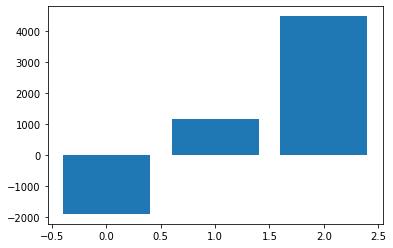

In [27]:
in_base=baseball_df[['BA','SLG','OBP']] # independent
de_base=baseball_df['RD']

model = LinearRegression()
model.fit(in_base, de_base)
importance = model.coef_

for x, y in zip(importance,in_base.columns):
  print(y,':',x)
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Instructor inspection

In [28]:
model.intercept_

-1463.7586442944912

In [31]:
import statsmodels.api as sm

ss = StandardScaler()
ss.fit(in_base)
scaled_in_base = ss.transform(in_base)
scaled_in_base = sm.add_constant(scaled_in_base)
olsmodel = sm.OLS(de_base, scaled_in_base).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:                     RD   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     72.35
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.48e-36
Time:                        13:10:49   Log-Likelihood:                -2110.7
No. Observations:                 360   AIC:                             4229.
Df Residuals:                     356   BIC:                             4245.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.665e-15      4.512  -5.91e-16      1.0

## Instructor observations

The features included in this subset correlate with a correlation coefficient of determination of 0.379, a mediocre r-squared score, meaning that there is probably some intercorrelation among the variables going on. Each independent variable in the ordinary least squares model contributes significantly, both in the scaled and unscaled version of the data. 

Here we see from the feature selection, which is to see the value of the coefficient, we can see that BA has a negative cofficient and the OBP has the highest coefficient meaning it has the of the most importance affecting the RD value.

## Model

Here we will be making multiple models. First one will be based on On Base Percentage and slugging percentage which would equate to Run Scored.

In [49]:
x1 = baseball_df[['OBP','SLG']]
y1 = baseball_df['RS']
Runs = LinearRegression() 
Runs.fit(x1,y1)
print(Runs.intercept_) 
print(Runs.coef_)

-863.9857062711809
[2629.98262323 1782.74782661]


Second model would be OOBP and OSLG equating to Runs Allowed.

In [50]:
x2 = baseball_df[['OOBP','OSLG']]
y2 = baseball_df['RA']
RunsAllowed = LinearRegression()
RunsAllowed.fit(x2,y2)
 
print(RunsAllowed.intercept_)
print(RunsAllowed.coef_)

-857.69785008923
[2789.36554242 1641.90047463]


The final model will be between Wins and Run Difference

In [51]:
x3 = baseball_df[['RD']]
y3 = baseball_df['W']
Wins = LinearRegression()
Wins.fit(x3,y3)
 
print(Wins.intercept_)
print(Wins.coef_)

80.96388888888889
[0.10176044]


Here is the final equation of the model.

1. RS= -863.99 + 2629.98(OBP) + 1782.75(SLG)
2. RA= -857.70 + 2789.66(OOBP) + 1641.90(OSLG)
3. W= 80.96 + 0.10(RD)

Putting it together and this it what it is

W= 80.96 + 0.10(RD)
W= 80.96 + 0.10(RS-RA)
W= 80.96 + 0.10([-863.99 + 2629.98(OBP) + 1782.75(SLG)] - [-857.70 + 2789.66(OOBP) + 1641.90(OSLG)])

## Feedback

You included all these terms and coefficients together into three separate models but only ended up modeling one of them. I wasn't really quite sure where you were going with this.

## Split train and test

In [43]:
x.shape

(360,)

In [44]:
x_rest,x_test,y_rest,y_test=train_test_split(x.reshape(-1, 1),y,test_size=0.2,random_state=42)

In [45]:
x_train,x_val,y_train,y_val=train_test_split(x_rest,y_rest,test_size=0.2,random_state=42)

In [46]:
scaler_final=StandardScaler()

regression_final=LinearRegression()

#create a pipeline for the cross validate
data_selection_pipe=Pipeline(steps=[('scaler',scaler_final),('regression',regression_final)],verbose=0)

In [47]:
cv_pipe_train=cross_validate(data_selection_pipe, x_train, y_train, cv=10, scoring= ('r2', 'neg_mean_squared_error'))
cv_pipe_test=cross_validate(data_selection_pipe, x_test, y_test, cv=10, scoring= ('r2', 'neg_mean_squared_error'))
cv_pipe_val=cross_validate(data_selection_pipe, x_val, y_val, cv=10, scoring= ('r2', 'neg_mean_squared_error'))
cv_pipe_rest=cross_validate(data_selection_pipe, x_rest, y_rest, cv=10, scoring= ('r2', 'neg_mean_squared_error'))

In [48]:
cv_pipe_train.keys()

dict_keys(['fit_time', 'score_time', 'test_r2', 'test_neg_mean_squared_error'])

In [49]:
cv_pipe_test.keys()

dict_keys(['fit_time', 'score_time', 'test_r2', 'test_neg_mean_squared_error'])

In [55]:
cv_pipe_train['test_r2'].mean()

0.8684252880500759

# Instructors investigation

In [63]:
for x, y in zip([cv_pipe_train, cv_pipe_test, cv_pipe_val, cv_pipe_rest], ["train", "test", "val", "rest"]):
    print(f"{y} mean squared: {x['test_r2'].mean():.2f} | {y} mean neg-MSE: {x['test_neg_mean_squared_error'].mean():.2f} | {y} mean RMSE: {abs(x['test_neg_mean_squared_error'].mean())**0.5:.2f}")

train mean squared: 0.87 | train mean neg-MSE: -16.06 | train mean RMSE: 4.01
test mean squared: 0.79 | test mean neg-MSE: -17.79 | test mean RMSE: 4.22
val mean squared: 0.77 | val mean neg-MSE: -18.31 | val mean RMSE: 4.28
rest mean squared: 0.86 | rest mean neg-MSE: -16.26 | rest mean RMSE: 4.03


## Conclusions

The better performance the team makes, it is most likely that they will make it to the playoffs and possibly win the League. The equation to see that would be 
1. RS= -863.99 + 2629.98(OBP) + 1782.75(SLG)
2. RA= -857.70 + 2789.66(OOBP) + 1641.90(OSLG)
3. W= 80.96 + 0.10(RD)
where RD= RS-RA.

Now the problem is that the data doesn't come with data on the players individually as well as their pricing so we don't know if they are more expensive or if the fall under the budget. However, we can say that all 

## Reference

Moneyball - Linear Regression
Harry Bitten - https://towardsdatascience.com/moneyball-linear-regression-76034259af5e

# Overall Remarks

You didn't quite finished your conclusion but I get the gist of what you were trying to communicate. The next step then would be to procure a historical dataset of player salaries for players recruited and traded per year. This would provide us our labels or ground truth value to how much players are being paid, which gives us details on things like the actual valuation of certain statistics, offset by some negotiation factor.

I would have liked to see some further correlation analysis or investigation of the importance of the other feautres in the dataset or a combination of factors and their affect on the target metric wins or a surrogate target metric.

That being said, I thought your analysis, layout, visualizations, explanations and modelling were good.